Task 2: Spam Detection using MultinomialNB ● Load a text dataset (e.g., SMS Spam Collection or any public text dataset). ● Preprocess using CountVectorizer or TfidfVectorizer. ● Train a MultinomialNB classifier. ● Evaluate: ○ Accuracy ○ Precision ○ Recall ○ Confusion Matrix

In [4]:
import pandas as pd
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()                           
    text = re.sub(r'\W', ' ', text)               # Remove punctuation
    text = re.sub(r'\d+', '', text)               # Remove numbers
    words = text.split()                          
    words = [stemmer.stem(w) for w in words if w not in stop_words] 
    return ' '.join(words)

data = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
data.columns = ['spam', 'text']                   
data['spam'] = data['spam'].map({'ham': 0, 'spam': 1}) 

data['text'] = data['text'].apply(preprocess)

x=data['text'].values
y=data['spam'].values

X_train, X_test, y_train, y_test = train_test_split(
    x,y , test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test,y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9821
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



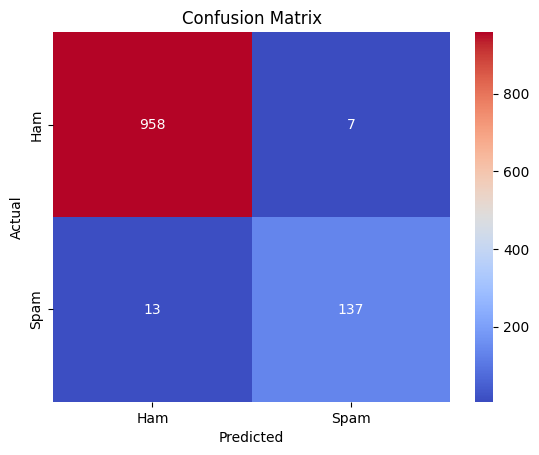

In [5]:
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()